In [1]:
!nvidia-smi

Thu Nov 13 21:07:52 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   48C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import torch
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Jun__6_02:18:23_PDT_2024
Cuda compilation tools, release 12.5, V12.5.82
Build cuda_12.5.r12.5/compiler.34385749_0
torch:  2.8 ; cuda:  cu126


In [3]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv5

In [4]:
%cd {HOME}
!git clone https://github.com/ultralytics/yolov5

%cd {HOME}/yolov5
!pip install -r requirements.txt

from IPython import display
display.clear_output()

## Install YOLOv8

In [5]:
!pip install "ultralytics<=8.3.40"

from IPython import display
display.clear_output()

!yolo settings sync=False

import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.8/112.6 GB disk)


## Install Detectron2

In [6]:
!python -m pip install 'git+https://github.com/facebookresearch/detectron2.git'

from IPython import display
display.clear_output()

import detectron2
print("detectron2:", detectron2.__version__)

detectron2: 0.6


## Install Supervision

In [7]:
!pip install supervision

from IPython import display
display.clear_output()

import supervision as sv
print("supervision", sv.__version__)

supervision 0.26.1


In [8]:
!pip install supervision[assets] -q

from IPython import display
display.clear_output()

In [9]:
from supervision.assets import download_assets, VideoAssets
from IPython import display


download_assets(VideoAssets.MARKET_SQUARE)
download_assets(VideoAssets.GROCERY_STORE)
download_assets(VideoAssets.SUBWAY)


display.clear_output()

In [10]:
from ultralytics import YOLO

model = YOLO('yolov8s.pt')

In [11]:
pip install --upgrade supervision


In [12]:
import supervision as sv
print(dir(sv))

video = sv.VideoInfo.from_video_path("/content/test.mp4")

['BackgroundOverlayAnnotator', 'BaseDataset', 'BlurAnnotator', 'BoxAnnotator', 'BoxCornerAnnotator', 'ByteTrack', 'CSVSink', 'CircleAnnotator', 'ClassificationDataset', 'Classifications', 'Color', 'ColorAnnotator', 'ColorLookup', 'ColorPalette', 'ComparisonAnnotator', 'ConfusionMatrix', 'CropAnnotator', 'DetectionDataset', 'Detections', 'DetectionsSmoother', 'DotAnnotator', 'EdgeAnnotator', 'EllipseAnnotator', 'FPSMonitor', 'HaloAnnotator', 'HeatMapAnnotator', 'IconAnnotator', 'ImageSink', 'InferenceSlicer', 'JSONSink', 'KeyPoints', 'LMM', 'LabelAnnotator', 'LineZone', 'LineZoneAnnotator', 'LineZoneAnnotatorMulticlass', 'MaskAnnotator', 'MeanAveragePrecision', 'OrientedBoxAnnotator', 'OverlapFilter', 'OverlapMetric', 'PercentageBarAnnotator', 'PixelateAnnotator', 'Point', 'PolygonAnnotator', 'PolygonZone', 'PolygonZoneAnnotator', 'Position', 'Rect', 'RichLabelAnnotator', 'RoundBoxAnnotator', 'TraceAnnotator', 'TriangleAnnotator', 'VLM', 'VertexAnnotator', 'VertexLabelAnnotator', 'Video


0: 736x1280 (no detections), 100.9ms
Speed: 7.8ms preprocess, 100.9ms inference, 42.9ms postprocess per image at shape (1, 3, 736, 1280)


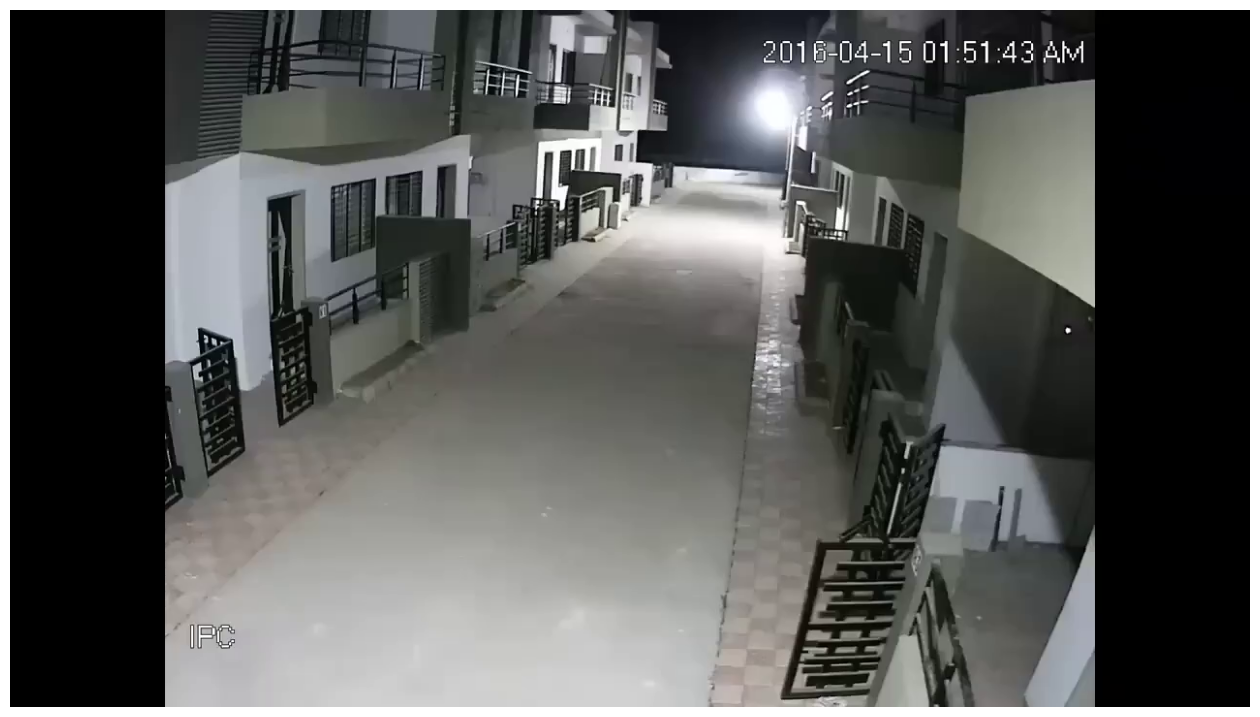

In [13]:
import supervision as sv

generator = sv.get_video_frames_generator("/content/test.mp4")
iterator = iter(generator)
frame = next(iterator)

results = model(frame, imgsz=1280)[0]
detections = sv.Detections.from_ultralytics(results)

box_annotator = sv.BoxAnnotator(thickness=4)
label_annotator = sv.LabelAnnotator(text_thickness=4, text_scale=2)
frame = box_annotator.annotate(scene=frame, detections=detections)
frame = label_annotator.annotate(scene=frame, detections=detections)

%matplotlib inline
sv.plot_image(frame, (16, 16))

**NOTE:** In this demo, our goal is primarily to detect people. Therefore, let's filter out detections related to other classes. By the way, we can also replace our bounding box labels with more human-friendly ones.


0: 736x1280 (no detections), 66.7ms
Speed: 10.2ms preprocess, 66.7ms inference, 1.1ms postprocess per image at shape (1, 3, 736, 1280)


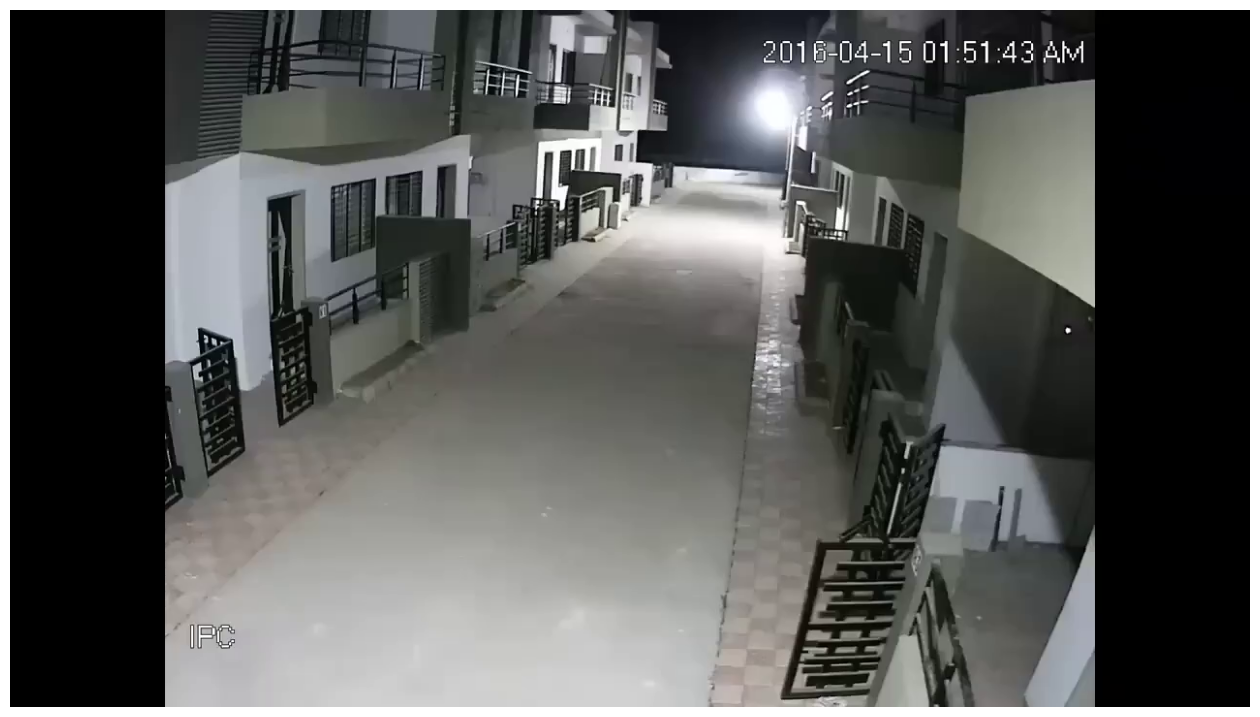

In [14]:
import supervision as sv

generator = sv.get_video_frames_generator("/content/test.mp4")
iterator = iter(generator)
frame = next(iterator)

results = model(frame, imgsz=1280)[0]
detections = sv.Detections.from_ultralytics(results)
detections = detections[detections.class_id == 0]

box_annotator = sv.BoxAnnotator(thickness=4)
label_annotator = sv.LabelAnnotator(text_thickness=4, text_scale=2)
labels = [f"{model.names[class_id]} {confidence:0.2f}" for _, _, confidence, class_id, _, _ in detections]
frame = box_annotator.annotate(scene=frame, detections=detections)
frame = label_annotator.annotate(scene=frame, detections=detections, labels=labels)

%matplotlib inline
sv.plot_image(frame, (16, 16))

**NOTE:** Now we can add a polygon zone to the scene and visualize it.

In [15]:
sv.VideoInfo.from_video_path("/content/test.mp4")

VideoInfo(width=1280, height=720, fps=25, total_frames=3711)


0: 736x1280 (no detections), 29.8ms
Speed: 5.9ms preprocess, 29.8ms inference, 3.3ms postprocess per image at shape (1, 3, 736, 1280)


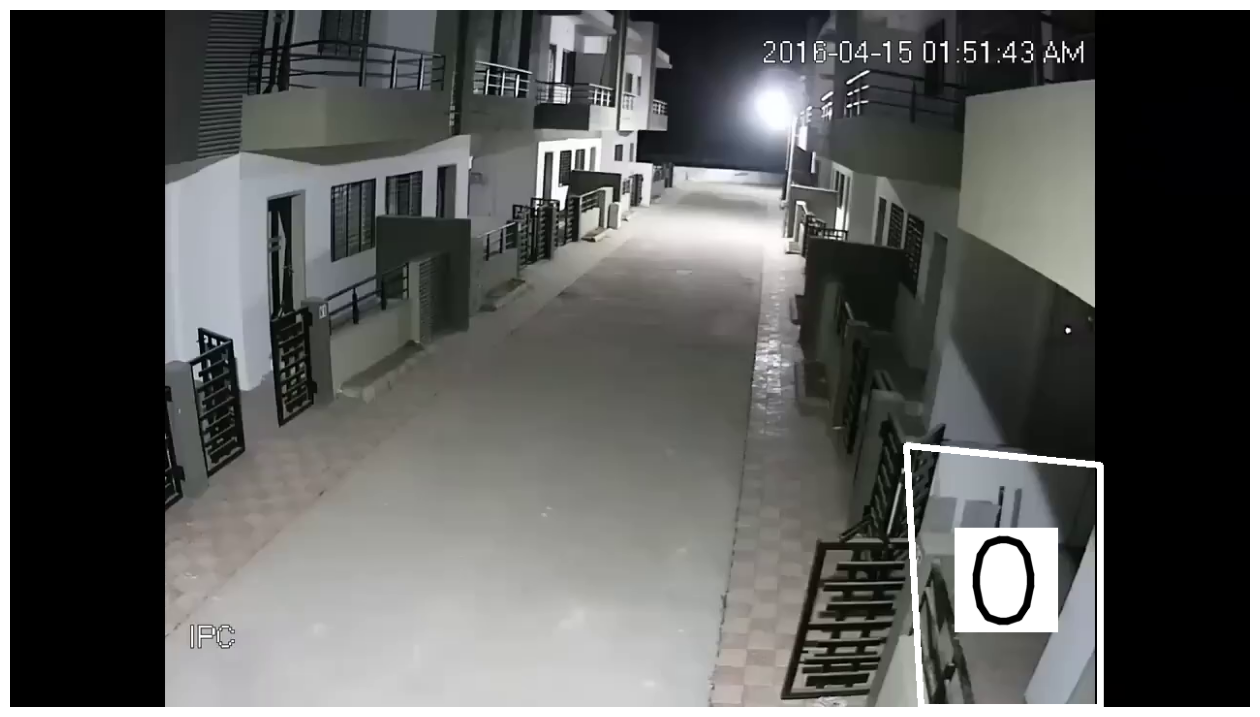

In [67]:
import numpy as np
import supervision as sv

# polygon zone
polygon = np.array([
    [940, 720],
    [1125, 720],
    [1125, 470],
    [925, 450]

])
video_info = sv.VideoInfo.from_video_path("/content/test.mp4")
zone = sv.PolygonZone(polygon=polygon)

box_annotator = sv.BoxAnnotator(thickness=4)
label_annotator = sv.LabelAnnotator(text_thickness=4, text_scale=2)
zone_annotator = sv.PolygonZoneAnnotator(zone=zone, color=sv.Color.WHITE, thickness=6, text_thickness=6, text_scale=4)

generator = sv.get_video_frames_generator("/content/test.mp4")
iterator = iter(generator)
frame = next(iterator)

results = model(frame, imgsz=1280)[0]
detections = sv.Detections.from_ultralytics(results)
detections = detections[detections.class_id == 0]
zone.trigger(detections=detections)

labels = [f"{model.names[class_id]} {confidence:0.2f}" for _, _, confidence, class_id, _, _ in detections]
frame = box_annotator.annotate(scene=frame, detections=detections)
frame = label_annotator.annotate(scene=frame, detections=detections, labels=labels)
frame = zone_annotator.annotate(scene=frame)

%matplotlib inline
sv.plot_image(frame, (16, 16))

**NOTE:** Note the number 1 visible in the middle of the zone we painted. Now let's try changing its location and see what happens.


0: 736x1280 (no detections), 29.7ms
Speed: 4.5ms preprocess, 29.7ms inference, 0.7ms postprocess per image at shape (1, 3, 736, 1280)


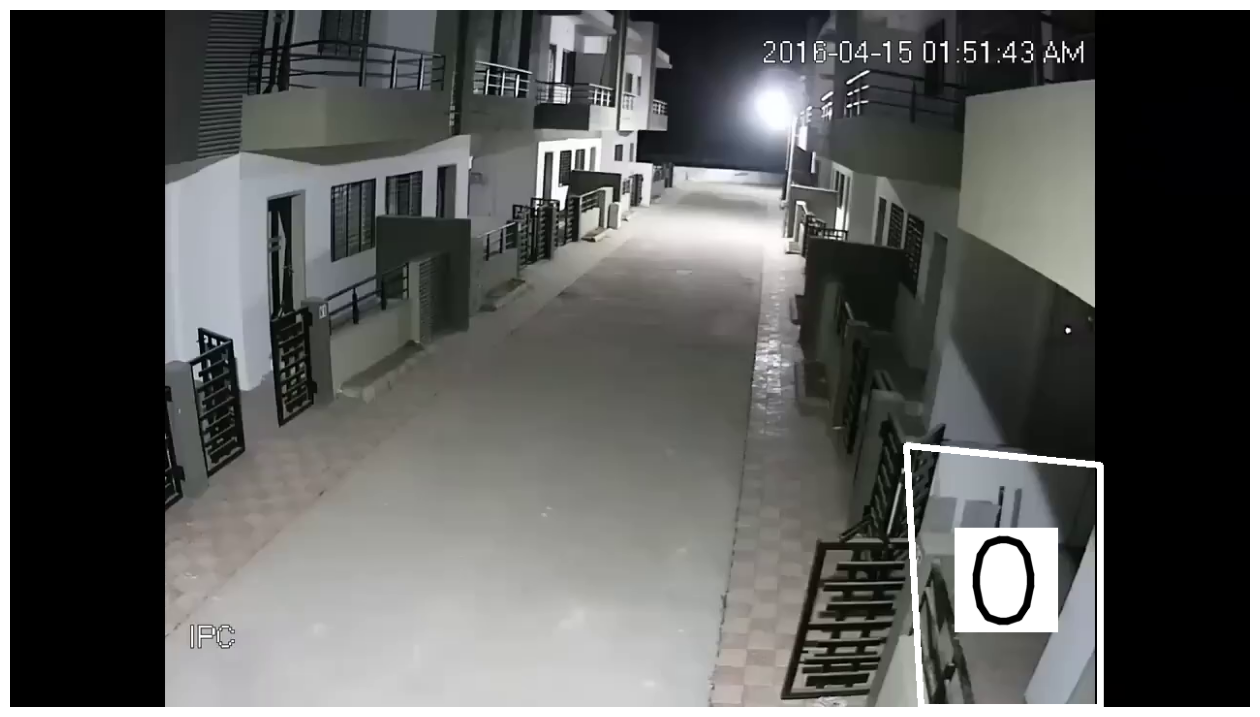

In [68]:
import numpy as np
import supervision as sv

# polygon zone
polygon = np.array([
    [940, 720],
    [1125, 720],
    [1125, 470],
    [925, 450]

])
video_info = sv.VideoInfo.from_video_path("/content/test.mp4")
zone = sv.PolygonZone(polygon=polygon)

box_annotator = sv.BoxAnnotator(thickness=4)
label_annotator = sv.LabelAnnotator(text_thickness=4, text_scale=2)
zone_annotator = sv.PolygonZoneAnnotator(zone=zone, color=sv.Color.WHITE, thickness=6, text_thickness=6, text_scale=4)

generator = sv.get_video_frames_generator("/content/test.mp4")
iterator = iter(generator)
frame = next(iterator)

results = model(frame, imgsz=1280)[0]
detections = sv.Detections.from_ultralytics(results)
detections = detections[detections.class_id == 0]
zone.trigger(detections=detections)

labels = [f"{model.names[class_id]} {confidence:0.2f}" for _, _, confidence, class_id, _, _ in detections]
frame = box_annotator.annotate(scene=frame, detections=detections)
frame = label_annotator.annotate(scene=frame, detections=detections, labels=labels)
frame = zone_annotator.annotate(scene=frame)

%matplotlib inline
sv.plot_image(frame, (16, 16))

In [70]:
import numpy as np
import supervision as sv

# polygon zone
polygon = np.array([
    [940, 720],
    [1125, 720],
    [1125, 470],
    [925, 450]

])
video_info = sv.VideoInfo.from_video_path("/content/test.mp4")
zone = sv.PolygonZone(polygon=polygon)

box_annotator = sv.BoxAnnotator(thickness=4)
label_annotator = sv.LabelAnnotator(text_thickness=4, text_scale=2)
zone_annotator = sv.PolygonZoneAnnotator(zone=zone, color=sv.Color.WHITE, thickness=6, text_thickness=6, text_scale=4)

def process_frame(frame: np.ndarray, _) -> np.ndarray:
    results = model(frame, imgsz=1280)[0]
    detections = sv.Detections.from_ultralytics(results)
    detections = detections[detections.class_id == 0]
    zone.trigger(detections=detections)

    labels = [f"{model.names[class_id]} {confidence:0.2f}" for _, _, confidence, class_id, _, _ in detections]
    frame = box_annotator.annotate(scene=frame, detections=detections)
    frame = label_annotator.annotate(scene=frame, detections=detections, labels=labels)
    frame = zone_annotator.annotate(scene=frame)

    return frame

sv.process_video(source_path="/content/test.mp4", target_path=f"{HOME}/test-result.mp4", callback=process_frame)

from IPython import display
display.clear_output()